# Implementing basic LSTM

using "for" and "concat"

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
! pip install jdc

In [0]:
# For data processing and maths
import numpy as np
import pandas as pd
import time
import math
import os
import jdc
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [0]:
# for deep learning and neural network
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
! pip install version_information

In [6]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,torch,numpy,seaborn, matplotlib

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
torch 1.3.0+cu100
numpy 1.16.5
seaborn 0.9.0
matplotlib 3.0.3
Mon Oct 21 17:15:30 2019 UTC

# 2)- Checking activation functions

An LSTM uses two types of activation functions:

- Sigmoid activation function.
- Tanh activation function.

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-1*z))

In [0]:
ACTIVATIONS = {'sigmoid': sigmoid,
               'tanh': np.tanh}

In [0]:
def plot_activation(activation):
    if activation not in ACTIVATIONS:
        return None

    z = np.arange(-10, 11, 1)
    g = ACTIVATIONS[activation](z)
    
    plt.plot(g)
    plt.title(activation.title())
    plt.xlabel('x')
    plt.ylabel('{}(x)'.format(activation))
    plt.show()

### 2.a)-Sigmoid Activation Function

Pushes input value between 0 and 1.

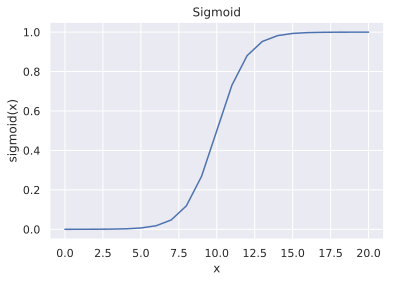

In [10]:
plot_activation('sigmoid')

### 2.b)-Tanh Activation Function

Pushes input values between -1 and 1.

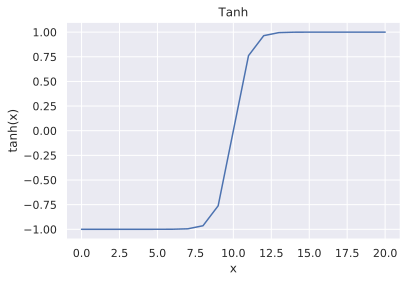

In [11]:
plot_activation('tanh')

# 3)- LSTM Implementation



### 3.a)- Using "for" loop

In [12]:
# Define LSTM architecture
SEQUENCE_LEN = 5  # The length of the sequence
INPUT_SIZE = 1  # Number of input features per time step
HIDDEN_SIZE = 1  # Number of LSTM blocks per layer of the RNN
BATCH_SIZE = 1  # The batch size
lstm = nn.LSTM(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE)

# Create fake inputs for the LSTM
inputs = torch.randn(SEQUENCE_LEN, BATCH_SIZE, INPUT_SIZE)

# Initialize the hidden state and cell states.
hidden_0 = torch.randn(1, BATCH_SIZE, HIDDEN_SIZE)
cell_0 = torch.randn(1, BATCH_SIZE, HIDDEN_SIZE)

# Step through the LSTM as it takes in the input sequence
for i, in_value in enumerate(inputs):
    # Step through the sequence one element at a time.
    # After each time step, hidden contains the hidden state.
    out, hidden_out = lstm(in_value.view(1, 1, -1), (hidden_0, cell_0))
    print('x_{}: {}'.format(i+1, out))
    print('h_{}: {}'.format(i+1, hidden_out))
    print('')

x_1: tensor([[[-0.1468]]], grad_fn=<StackBackward>)
h_1: (tensor([[[-0.1468]]], grad_fn=<StackBackward>), tensor([[[-0.3909]]], grad_fn=<StackBackward>))

x_2: tensor([[[-0.1085]]], grad_fn=<StackBackward>)
h_2: (tensor([[[-0.1085]]], grad_fn=<StackBackward>), tensor([[[-0.2795]]], grad_fn=<StackBackward>))

x_3: tensor([[[-0.0987]]], grad_fn=<StackBackward>)
h_3: (tensor([[[-0.0987]]], grad_fn=<StackBackward>), tensor([[[-0.2524]]], grad_fn=<StackBackward>))

x_4: tensor([[[-0.0960]]], grad_fn=<StackBackward>)
h_4: (tensor([[[-0.0960]]], grad_fn=<StackBackward>), tensor([[[-0.2452]]], grad_fn=<StackBackward>))

x_5: tensor([[[-0.0853]]], grad_fn=<StackBackward>)
h_5: (tensor([[[-0.0853]]], grad_fn=<StackBackward>), tensor([[[-0.2163]]], grad_fn=<StackBackward>))



### 3.b)-LSTM using cat.

In [0]:
# Define LSTM architecture
SEQUENCE_LEN = 5  # The length of the sequence
INPUT_SIZE = 1  # Number of input features per time step
HIDDEN_SIZE = 1  # Number of LSTM blocks per layer of the RNN
BATCH_SIZE = 1  # The batch size
lstm = nn.LSTM(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE)

# Create the inputs for the LSTM
inputs = [torch.randn(BATCH_SIZE, INPUT_SIZE) for _ in range(SEQUENCE_LEN)]

# Concatenate the inputs so that they are a tensor
inputs = torch.cat(inputs).view(len(inputs), 1, -1)

# Initialize the hidden state and cell states.
hidden_0 = torch.randn(1, BATCH_SIZE, HIDDEN_SIZE)
cell_0 = torch.randn(1, BATCH_SIZE, HIDDEN_SIZE)

out, hidden = lstm(inputs, (hidden_0, cell_0))  # out = all states, hidden = last state and last cell state

In [14]:
print('out: {}'.format(out))
print('last hidden and cell states: {}'.format(hidden))

out: tensor([[[-0.3079]],

        [[-0.2485]],

        [[-0.1618]],

        [[-0.1637]],

        [[-0.1624]]], grad_fn=<StackBackward>)
last hidden and cell states: (tensor([[[-0.1624]]], grad_fn=<StackBackward>), tensor([[[-0.3639]]], grad_fn=<StackBackward>))
